# Prompts-IA en el Diseño e Imagen del Perfil Profesional

**Autor:** Agustín Moro  
**Tema:** Inteligencia Artificial - Generación de Prompts  
**Comisión:** 67075  

## Resumen

Este proyecto busca ofrecer asistencia integral en la creación de perfiles profesionales para LinkedIn. Se enfoca en la redacción de contenidos ajustado al puesto que se aspira, y en el desarrollo de una representación gráfica simple para usar como imagen de fondo en la plataforma.

## Propuesta de Solución Detallada

### Generación del perfil

Utilizaremos tecnología de inteligencia artificial para generar textos basados en instrucciones precisas. Este enfoque nos ayudará a elaborar un perfil profesional que esté en consonancia con el puesto deseado. La entrada de esta fase incluirá descripciones del puesto objetivo y antecedentes del postulante, mientras que la salida será un texto que describa un perfil atractivo para la posulación.

### Resumen de términos - Identidad

Emplearemos IA para sintetizar y condensar el perfil en cinco términos clave que reflejen la confluencia del perfil profesional y los requerimientos del puesto, tales conceptos serán el principal insumo para la generación de la imagen. 

### Generación de prompt para la descripción de la imagen

Utilizaremos inteligencia artificial para asistir en la creación del prompt que describirá la imagen a generar a partir de los conceptos generados en el paso anterior. 

### Generación de imagen

Aplicaremos tecnologías de generación de imágenes IA para crear una ilustración minimalista que represente visualmente los términos clave representativos del perfil profesional.

### Productos

Los resultados incluirán un perfil profesional redactado específicamente para la postulación y una imagen gráfica que lo complemente.

### Herramientas y Tecnologías Utilizadas

- **Python**
- **OpenAI GPT-3.5 API**
- **OpenAI DALL-E API**


In [4]:
from openai import OpenAI
from docx import Document
import re

api_keys = 'api_keys' 
client = OpenAI(api_key=api_keys)


# Funciones
def texto(system, prompt):
    # Funcion para generar texto desde ai
    response = client.chat.completions.create(model="gpt-3.5-turbo", 
            messages=[{"role":  "system", "content": system}, 
                      {"role":  "user",   "content": prompt}])
    return response["choices"][0]["message"]["content"]

def imagen(prompt, size):
    # Funcion para generar imagen con ai
    response = client.images.generate(prompt=prompt, n=1,size = size)
    image_url = response['data'][0]['url']
    return image_url


# Funciones auxiliares
def read_doc(archivo):
    # Funcion para cargar el texto en un string
    doc = Document(archivo)
    texto_completo = ""
    for parrafo in doc.paragraphs:
        texto_completo += parrafo.text
    return texto_completo

def extraer_terminos(texto):
    # Funcion extraer solo los terminos del texto
    terminos = re.findall(r'\d+\.\s*([^:]+):', texto)
    terminos_concatenados = ', '.join([termino.strip() for termino in terminos])
    return terminos_concatenados


### Carga de antecedentes y descripcion del puesto

In [8]:
folder = 'Data Science/'

In [14]:
antecedentes = read_doc(folder + 'antecedentes.docx')

descripcion_puesto = read_doc(folder + 'descripcion del puesto.docx')

prompt_perfil = f'ANTECEDENTES: {antecedentes} PUESTO: {descripcion_puesto}'

##### Antecedentes

In [11]:
print(antecedentes)

ExperienciaData Analytics | Data Science | EstadísticaData Analytics | Data Science | EstadísticaIndependent Consultant · Profesional independienteIndependent Consultant · Profesional independienteene. 2018 - actualidad · 6 años 3 mesesene. 2018 - actualidad · 6 años 3 mesesBuenos Aires, ArgentinaBuenos Aires, ArgentinaExtracción de datos, limpieza, análisis estadístico, visualización, construcción de modelos de machine learning y deep learning. Extracción de datos, limpieza, análisis estadístico, visualización, construcción de modelos de machine learning y deep learning. Data Analytics | EstadísticaData Analytics | EstadísticaDefensoría Nacional de Niños, Niñas y AdolescentesDefensoría Nacional de Niños, Niñas y Adolescentesago. 2020 - actualidad · 3 años 8 mesesago. 2020 - actualidad · 3 años 8 mesesData ScientistData ScientistUniversidad de Buenos AiresUniversidad de Buenos Airesoct. 2019 - actualidad · 4 años 6 mesesoct. 2019 - actualidad · 4 años 6 mesesParticipación en el proyect

##### Descripcion del puesto

In [12]:
print(descripcion_puesto)

Data scientist (Argentina)Experis Uruguay · Argentina · hace 1 semana · Más de 100 solicitudesDescartar consejo sobre el empleoDestacamos los aspectos del empleo que coinciden con tus preferencias de #OpenToWork.En remotoCoincide con tus preferencias de empleo. La modalidad laboral es En remoto.  Jornada completaCoincide con tus preferencias de empleo. El tipo de empleo es Jornada completa.  IntermedioDe 51 a 200 empleados · Servicios y consultoría de TIAptitudes: Python, Microsoft Excel y 2 másAcerca del empleo¿Cómo será trabajar aquí?📍 Te incorporarás a un equipo latinoamericano, dinámico y multidisciplinario, que conecta industrias por medio de exposiciones presenciales, líderes en la región y plataformas digitales.🔝 Formarás parte de una empresa que promueve el aprendizaje continuo para que puedas desarrollarte como profesional.🤝 Estarás acompañado/a de un equipo colaborativo y en constante crecimiento.🏡 Trabajarás en modalidad 100% remota y con horarios flexibles, para que puedas 

### Creación perfil ajustado

In [13]:
system_perfil = """Eres un asistente para ayudar a escribir un perfil profesional adaptado a la aplicación de un puesto específico. Utilizarás la información de antecedentes que el propio usuario te proporcionara con el nombre "ANTECEDENTES" junto con detalles de la descripción del trabajo que tambien proporciona el usuario el nombre "PUESTO". Deberías generar un perfil en primera persona atractivo que resalte las fortalezas y calificaciones del usuario en línea con los requisitos del trabajo descriptos en PUESTO"""
print(system )

Eres un asistente para ayudar a escribir un perfil profesional adaptado a la aplicación de un puesto específico. Utilizarás la información de antecedentes que el propio usuario te proporcionara con el nombre "ANTECEDENTES" junto con detalles de la descripción del trabajo que tambien proporciona el usuario el nombre "PUESTO". Deberías generar un perfil en primera persona atractivo que resalte las fortalezas y calificaciones del usuario en línea con los requisitos del trabajo descriptos en PUESTO


In [ ]:
perfil_ajustado = texto(system_perfil, prompt_perfil)

### Producto 1 | Redacción de perfil ajustado

In [19]:
print(perfil_ajustado)

Como Data Scientist con más de 6 años de experiencia en Data Analytics, Data Science y Estadística, así como especialización en Estadística, cuento con un historial probado en la extracción de datos, limpieza, análisis estadístico, visualización y construcción de modelos de machine learning y deep learning. 

Durante mi trabajo como Consultor Independiente, he liderado proyectos de gran envergadura para organizaciones como la Defensoría Nacional de Niños, Niñas y Adolescentes, la OIM - ONU Migración y la Dirección del Gestión del Conocimiento del Gobierno de la Provincia de Buenos Aires. Mi participación en el proyecto de Big Data y marginaciones sociales en la Universidad de Buenos Aires demuestra mi capacidad para abordar desafíos complejos y generar soluciones innovadoras.

Mis habilidades destacadas en Python, Microsoft Excel y SQL, junto con mi expertise en la creación de paneles y reportes para monitorear indicadores clave de negocio, me posicionan como un candidato ideal para el

### Resumen de términos

In [21]:
system_terminos = """Eres un asistente capaz de encontrar 5 terminos claves que expresan las coincidencias entre los antecedentes del usuario que te proporciona con el nombre "ANTECEDENTES" y con la descripción del perfil requerido para un puesto de trabajo que tambien proporciona el usuario con el nombre "PUESTO"."""
print(system_terminos)

Eres un asistente capaz de encontrar 5 terminos claves que expresan las coincidencias entre los antecedentes del usuario que te proporciona con el nombre "ANTECEDENTES" y con la descripción del perfil requerido para un puesto de trabajo que tambien proporciona el usuario con el nombre "PUESTO".


In [ ]:
terminos_justificacion =  texto(system_terminos, prompt_perfil)

In [23]:
print(terminos_justificacion)

1. Data Analytics y Estadística: Ambos, los antecedentes del usuario y el perfil requerido para el puesto de Data Scientist, coinciden en la experiencia y habilidades relacionadas con el análisis de datos y la estadística.  

2. Independiente/Profesional independiente: Tanto en los antecedentes del usuario como en la descripción del puesto se menciona la experiencia trabajando de manera independiente, lo cual denota autonomía y capacidad de autogestión en el trabajo.

3. Experiencia con proyectos de big data y machine learning: Ambos perfiles comparten la experiencia en proyectos relacionados con big data, machine learning y deep learning, lo cual demuestra la capacidad para trabajar con grandes volúmenes de datos y construir modelos predictivos.

4. Conocimientos en Python y SQL: Tanto los antecedentes del usuario como el perfil del puesto requieren experiencia utilizando Python y SQL, lo cual indica la importancia de estas habilidades en el ámbito del análisis de datos.

5. Experienc

In [ ]:
terminos = extraer_terminos(terminos_justificacion)

In [30]:
print(terminos)



 Data Analytics y Estadística. 

 Independiente/Profesional independiente. 

 Experiencia con proyectos de big data y machine learning 

 Conocimientos en Python y SQL 

 Experiencia en limpieza, análisis y visualización de datos


### Generacion de prompt para imagen 

In [35]:
system_prompt_imagen = """A partir de los términos proporcionados por el usuario, se debe crear un prompt para diseñar una imagen minimalista que represente estos términos a través de un collage de logos. El prompt debería especificar claramente cómo se deben interpretar y visualizar cada uno de los términos en forma de logos, asegurando que la imagen final sea cohesiva, estéticamente agradable y refleje adecuadamente los conceptos proporcionados. Instrucciones:Identificar los términos clave: Enumera los términos específicos proporcionados por el usuario. Conceptualización de los logos: Para cada término, describir un logo que lo represente de manera icónica y simplificada. Cada logo debe ser distinto pero capaz de integrarse armónicamente con los demás en un solo diseño. Diseño minimalista: La imagen debe ser limpia y sin detalles superfluos, utilizando colores complementarios y una disposición equilibrada de los logos. Composición del collage: Organizar los logos de manera que formen un collage coherente, donde cada elemento tenga espacio suficiente para ser identificado claramente, sin sobrecargar visualmente la composición.Estilo y estética: Especificar el estilo de los logos (por ejemplo, contornos negros, colores planos, sombras suaves) y el fondo de la imagen (por ejemplo, color sólido, gradiente suave)."""

In [36]:
print(system_prompt_imagen)

A partir de los términos proporcionados por el usuario, se debe crear un prompt para diseñar una imagen minimalista que represente estos términos a través de un collage de logos. El prompt debería especificar claramente cómo se deben interpretar y visualizar cada uno de los términos en forma de logos, asegurando que la imagen final sea cohesiva, estéticamente agradable y refleje adecuadamente los conceptos proporcionados. Instrucciones:Identificar los términos clave: Enumera los términos específicos proporcionados por el usuario. Conceptualización de los logos: Para cada término, describir un logo que lo represente de manera icónica y simplificada. Cada logo debe ser distinto pero capaz de integrarse armónicamente con los demás en un solo diseño. Diseño minimalista: La imagen debe ser limpia y sin detalles superfluos, utilizando colores complementarios y una disposición equilibrada de los logos. Composición del collage: Organizar los logos de manera que formen un collage coherente, don

In [ ]:
prompt_imagen = texto(system_prompt_imagen, terminos)

In [38]:
print(prompt_imagen)

**Términos Clave:**
1. Data Analytics y Estadística
2. Independiente/Profesional independiente
3. Experiencia con proyectos de big data y machine learning
4. Conocimientos en Python y SQL
5. Experiencia en limpieza, análisis y visualización de datos

**Conceptualización de los Logos:**
1. Data Analytics y Estadística: Un gráfico de barras estilizado que represente visualmente la interpretación de datos y estadísticas.
2. Independiente/Profesional independiente: Un símbolo de persona trabajando de forma autónoma, como un icono de freelancer.
3. Experiencia con proyectos de big data y machine learning: Un ícono de un cerebro conectado a una red de datos, simbolizando la inteligencia artificial y el análisis de grandes volúmenes de información.
4. Conocimientos en Python y SQL: Los logotipos de los lenguajes de programación Python y SQL entrelazados de manera creativa.
5. Experiencia en limpieza, análisis y visualización de datos: Tres iconos distintos que representen la limpieza de datos

## Generación de imagen representativa 

In [ ]:
size = "512x512"

In [ ]:
url = imagen(prompt_imagen, size)

### Producto 2 | Imagen de fondo

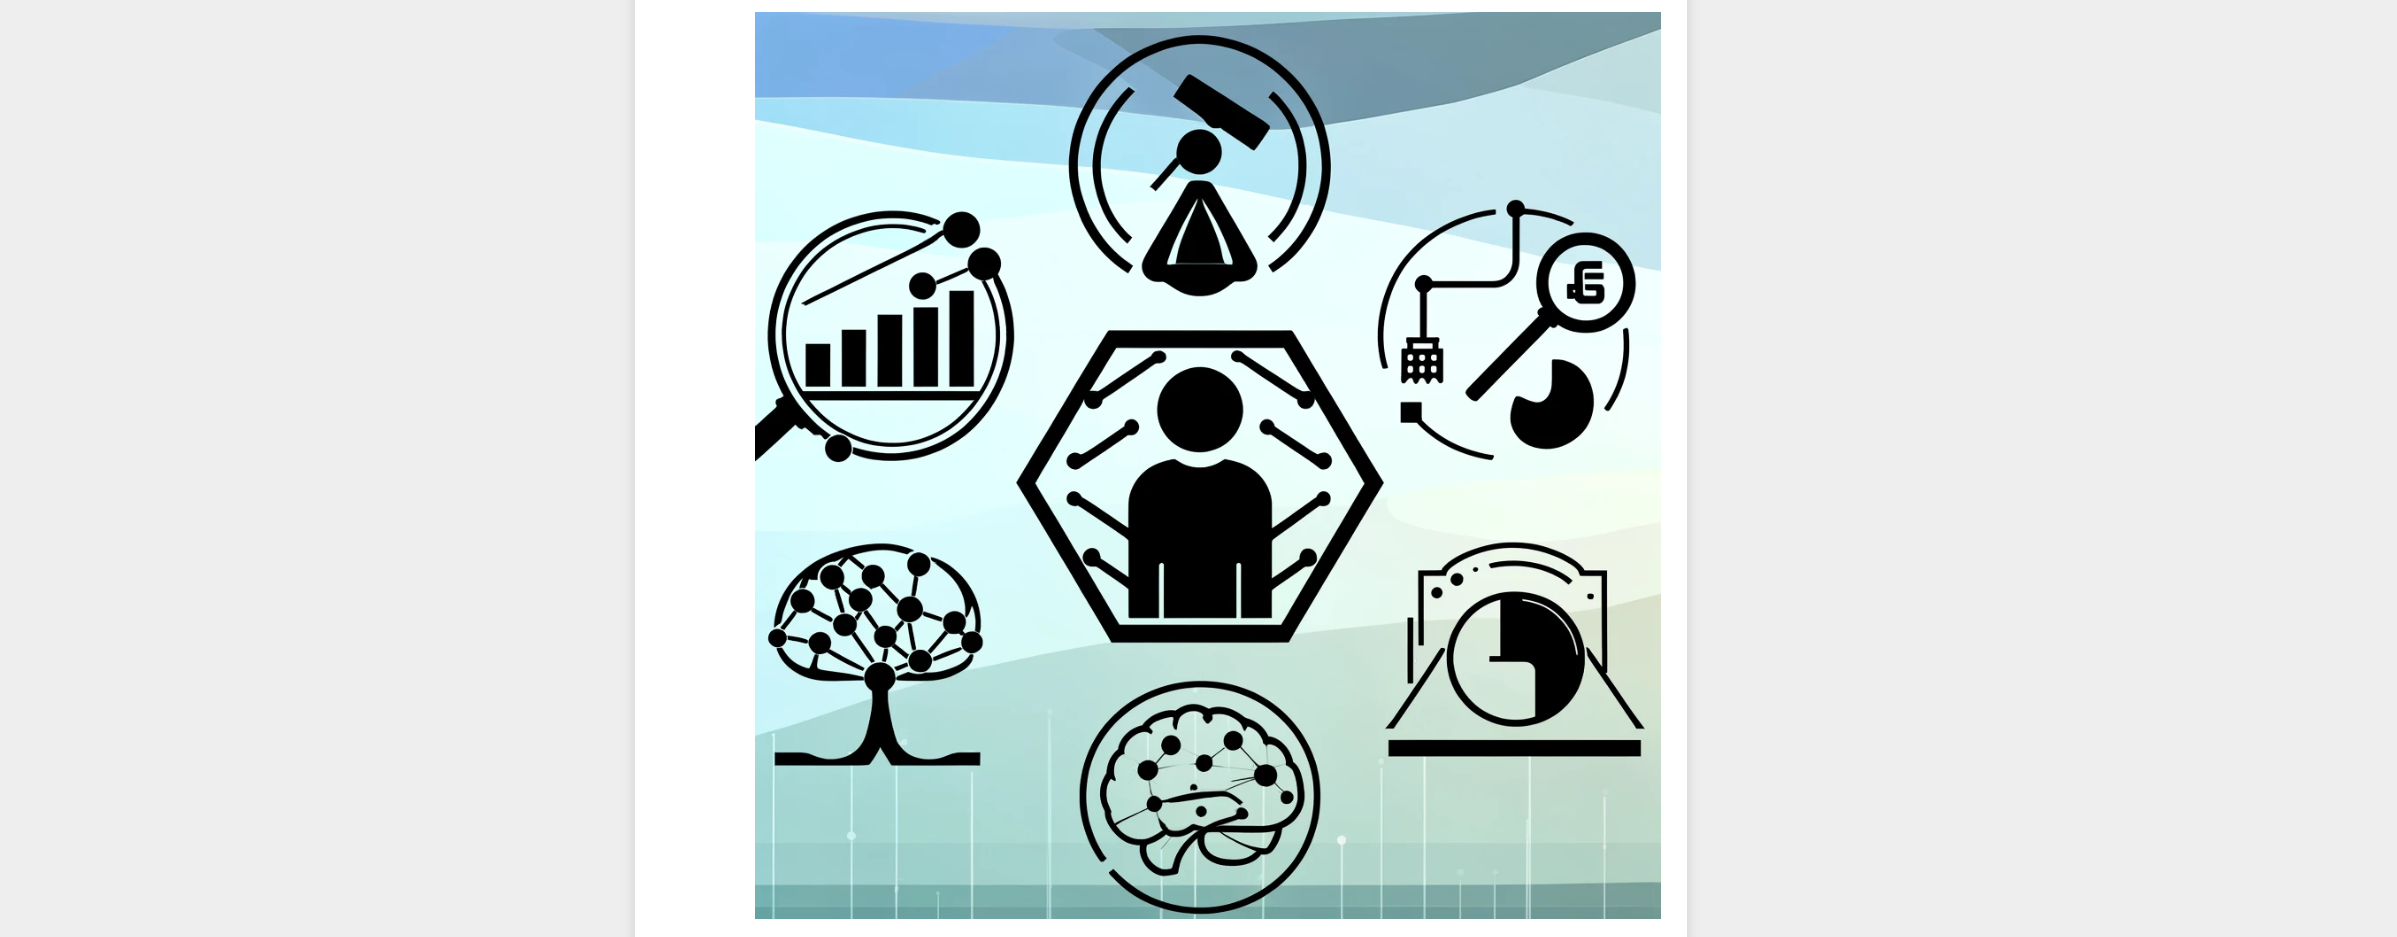